In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Company_Data.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data[data.duplicated()].shape

(0, 11)

<function matplotlib.pyplot.show(*args, **kw)>

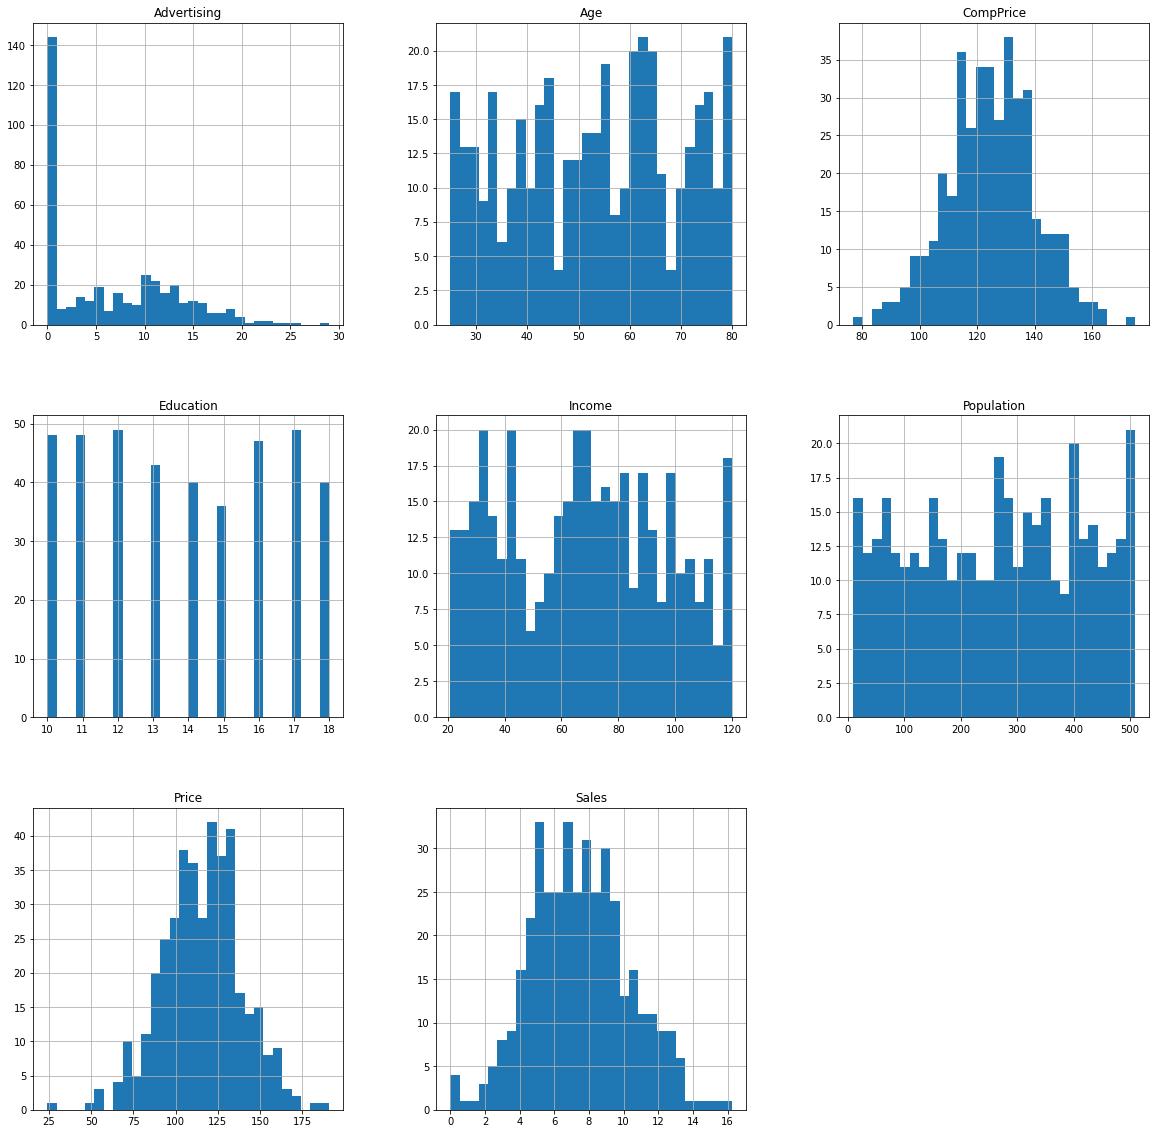

In [7]:
data.hist(bins=30,figsize=(20,20))
plt.show

In [8]:
#data=pd.get_dummies(data=data,columns=['ShelveLoc','Urban','US'])
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])
#A=data[['US']].copy() A[data['US']=='Yes']=50 A[data['US']=='No']=100 data[['US']]=A.copy() 

#changing value assigned to categorical varibles does not change the efficiency 
#but the structure of decision tree is changed.

#its better to use label encoder rather than get dummies for decesion tree models.

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [10]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [11]:
A=data[['Sales']].copy()

In [12]:
#converting sale to categorical varible
A[data['Sales']>=(7.496 +(2*2.82))]=3
A[data['Sales']<=(7.496 -(2*2.82))]=1
A[( data['Sales']>(7.496 -(2*2.82)) ) & ( data['Sales']<(7.496 +(2*2.82)) )]=2

In [13]:
data[['Sales']]=A.copy()

In [14]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2.0,138,73,11,276,120,0,42,17,1,1
1,2.0,111,48,16,260,83,1,65,10,1,1
2,2.0,113,35,10,269,80,2,59,12,1,1
3,2.0,117,100,4,466,97,2,55,14,1,1
4,2.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2.0,138,108,17,203,128,1,33,14,1,1
396,2.0,139,23,3,37,120,2,55,11,0,1
397,2.0,162,26,12,368,159,2,40,18,1,1
398,2.0,100,79,7,284,95,0,50,12,1,1


In [15]:
x=np.array(data.iloc[:,1:])
y=np.array(data.iloc[:,0:1])

In [16]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

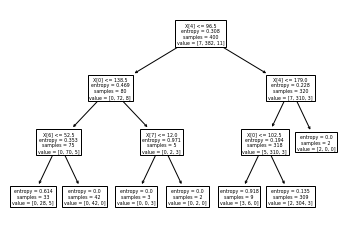

In [17]:
tree.plot_tree(model)
plt.show()

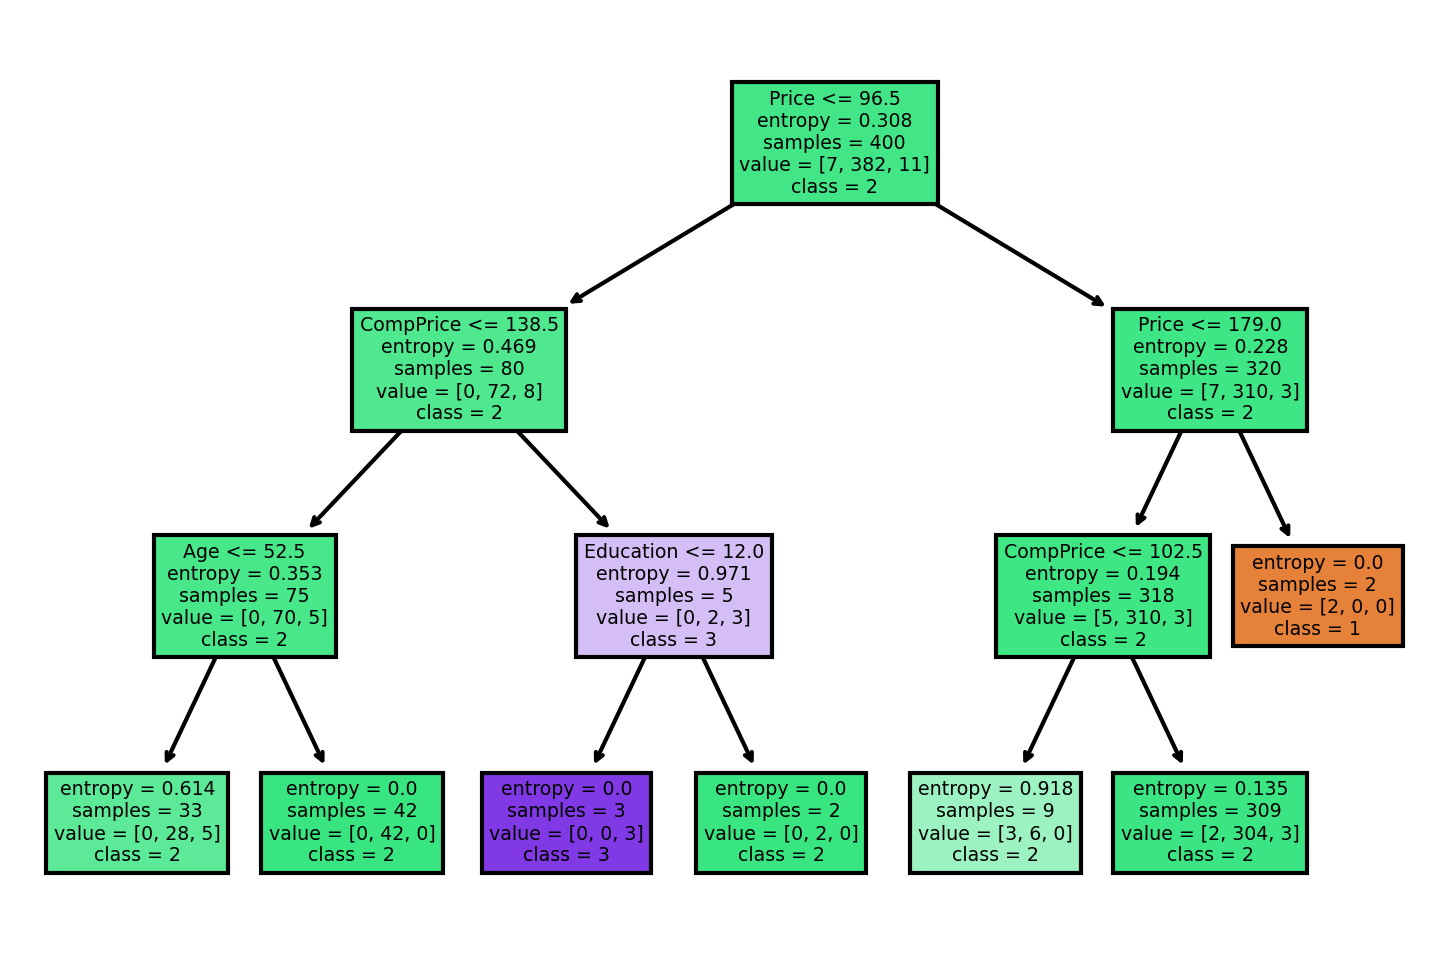

In [18]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1','2','3']
fig, axes= plt.subplots(nrows=1,ncols=1,figsize=(6,4),dpi=300)
tree.plot_tree(model, feature_names= fn, class_names=cn,filled=True);

# The category that contribute most to sales are
# 1> Price
# 2> Competitor price
# 3> Age
# 4> Education

In [19]:
pred=model.predict(x)
pd.Series(pred).value_counts()

2.0    395
3.0      3
1.0      2
dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,pred)
print(confusion_matrix)

[[  2   5   0]
 [  0 382   0]
 [  0   8   3]]


In [21]:
(confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2])/confusion_matrix.sum()

0.9675

In [22]:
# 0.9675

In [23]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

         1.0       1.00      0.29      0.44         7
         2.0       0.97      1.00      0.98       382
         3.0       1.00      0.27      0.43        11

    accuracy                           0.97       400
   macro avg       0.99      0.52      0.62       400
weighted avg       0.97      0.97      0.96       400



# edit

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(1,5))
param_grid = dict(n_neighbors=n_neighbors)

model = model= DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

ValueError: Invalid parameter n_neighbors for estimator DecisionTreeClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [31]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined